K-means

In [2]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters, max_iterations=100, random_seed=None):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.random_seed = random_seed
        self.centroids = None

    def fit(self, X):
        np.random.seed(self.random_seed)

        # Initialize centroids randomly from the data points
        random_indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iterations):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels(X)

            # Calculate new centroids based on the assigned points
            new_centroids = self._calculate_centroids(X, labels)

            # Check if centroids have converged
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

    def _assign_labels(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def _calculate_centroids(self, X, labels):
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for cluster_idx in range(self.n_clusters):
            cluster_points = X[labels == cluster_idx]
            if len(cluster_points) > 0:
                new_centroids[cluster_idx] = cluster_points.mean(axis=0)
        return new_centroids

    def predict(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)


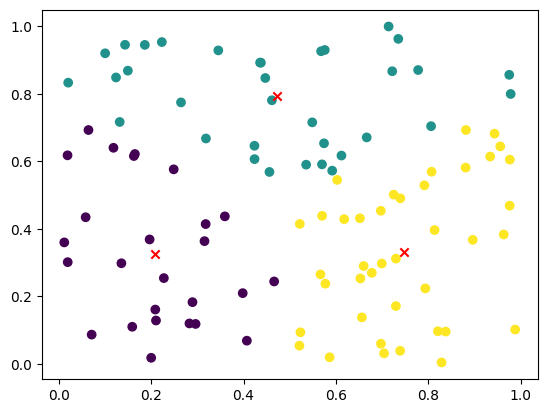

In [3]:
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 2)

# Create a KMeans instance with 3 clusters
kmeans = KMeans(n_clusters=3, random_seed=42)

# Fit the data
kmeans.fit(X)

# Get cluster labels for each data point
labels = kmeans.predict(X)

# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


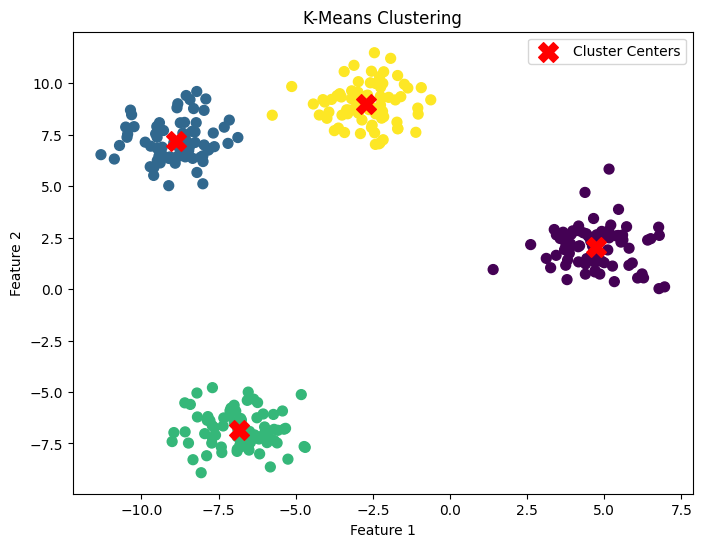

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data (you can replace this with your own data)
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Create a K-Means model with the desired number of clusters (e.g., 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the data
kmeans.fit(data)

# Get cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Plot the data points colored by their cluster labels and cluster centers
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=50)

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()